# Лабораторная 1. Начало работы с данными

# Загрузка и подготовка датасета

Загрузка библиотек

In [ ]:
import pandas as pd
from google.colab import files 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

Загружаем файл и задаем датафрейм

In [ ]:
uploaded = files.upload()

Saving cars_moldova.csv to cars_moldova.csv


In [ ]:
df = pd.read_csv('/content/cars_moldova.csv', delimiter = ',')
df.head(4)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0


Избавляемся от дубликатов

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

Проводим очистку от выбросов

In [ ]:
#Убираем записи со слишком маленьким пробегом для возраста
question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# Удаляем записи со слишком большим пробегом
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# Удаляем записи со слишком большим и слишком маленьким объемом двигателя
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

#Убираем записи со слишком низкой и высокой ценой
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

#Удаляем записи со слишком большим возрастом
question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)


# Задание 1

### Визуализация данных с использованием библиотеки Pandas. 

Создаем списки числовых и номинальных признаков

In [ ]:
obj_columns = []
num_columns = []

for columns in df.columns:
  if (df[columns].dtypes == object):
    obj_columns += [columns]
  else:
    num_columns += [columns]

print('Категориальные данные:\t ', obj_columns,
      '\n Число столбцов = ', len(obj_columns))
print('Числовые данные:\t ', num_columns,
      '\n Число столбцов = ', len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столбцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столбцов =  4


Построим гистограммы для всех числовых признаков

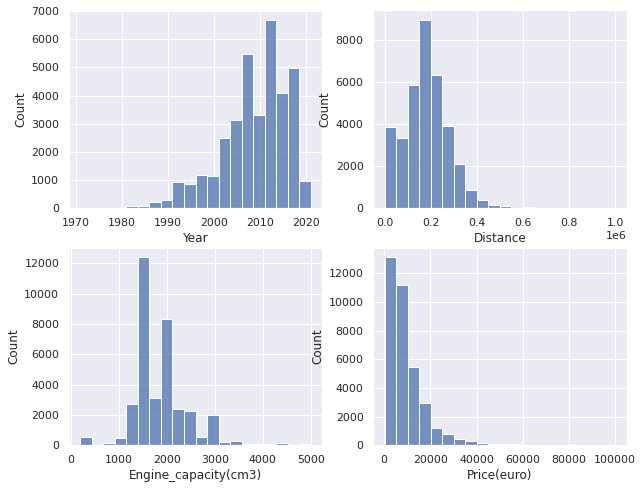

In [ ]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(10,8))

for idx, column_name in enumerate(num_columns):

  plt.subplot(height, width, idx+1)
  sns.histplot(data=df,
               x=column_name, bins = 20);

На гистограмме мы можем видеть распределение числовых признаков

Построим скатерограмму

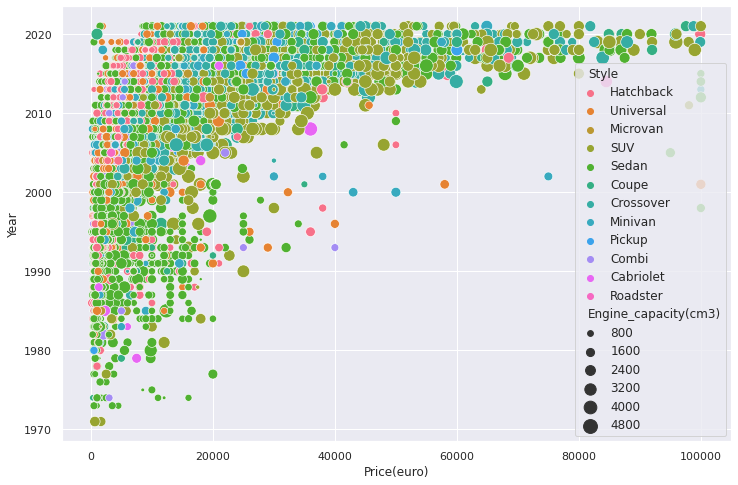

In [ ]:
plt.figure(figsize=(12,8))

sns.scatterplot(x=df['Price(euro)'], 
                y=df['Year'],
                size=df['Engine_capacity(cm3)'],
                sizes=(10, 200),
                hue=df['Style']
                )

На гистограмме мы можем наблюдать зависимость между объемом двигателя, ценой, формой и годом выпуска. Например, мы можем установить, что с повышением объема двигателя повышается цена, то, что Hatchback и Universal как правило дешевле других форм, а у SUV, Sedan и Coupe объем двигателя в среднем больше.

Построим графики зависимостей типа трансмиссии от других числовых признаков

<Figure size 1080x1080 with 0 Axes>

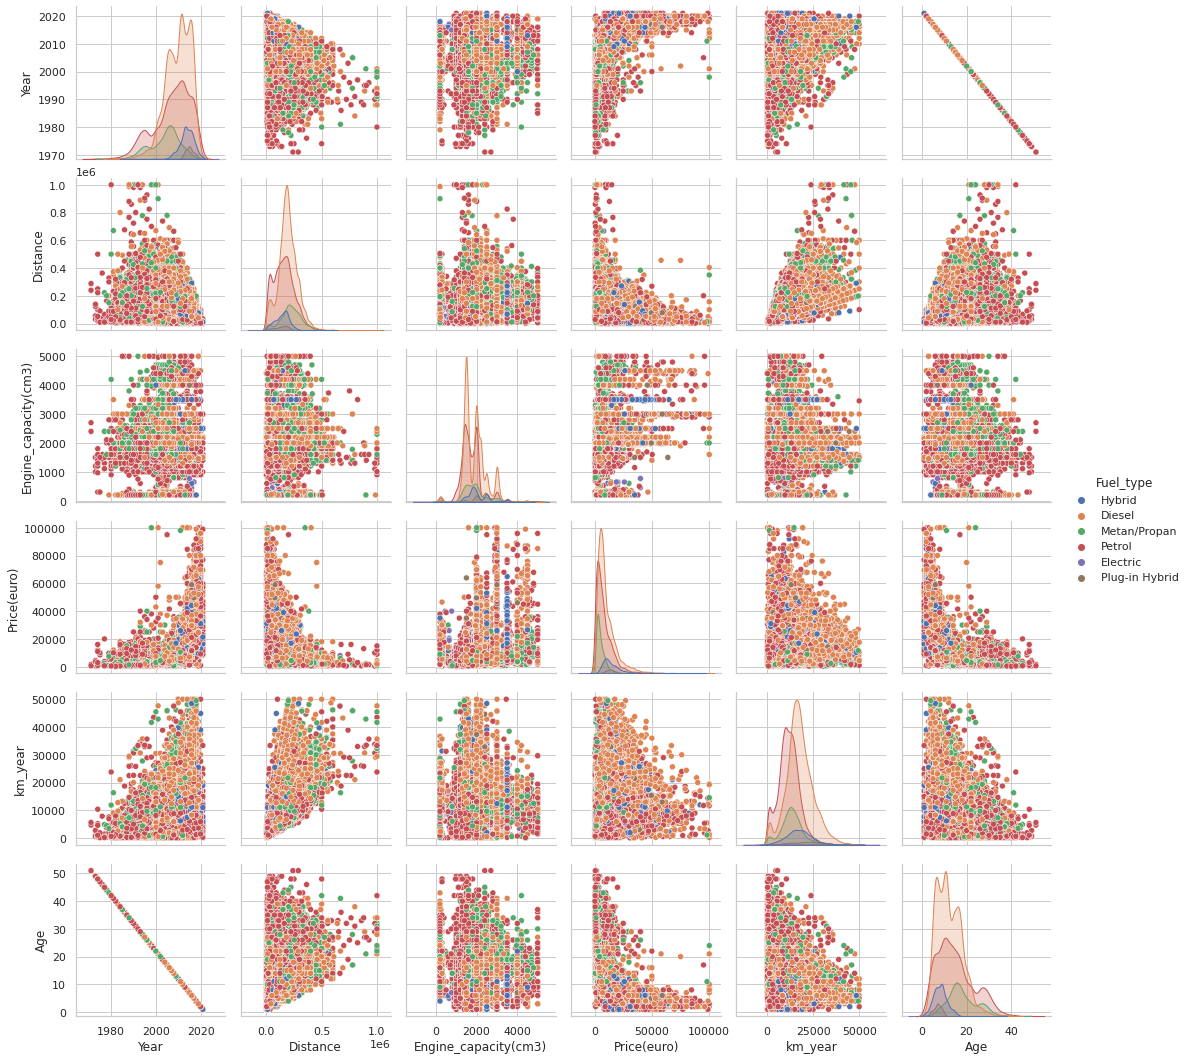

In [120]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, 
             hue ='Fuel_type',
             );

На графиках можно увидеть зависимости между числовыми признаками, а также паттерны распределения различных видов трансмиссии. Так, например, мы можем видеть, что более старые автомобили стоят меньше, чем более новые, хотя до какого-то возраста возможны уникальные модели по более высокой цене. Мы также можем заметить, что автомобили на дизельном топливе чаще всего имеют средний объем двигателя.

Построим график линейной регрессии

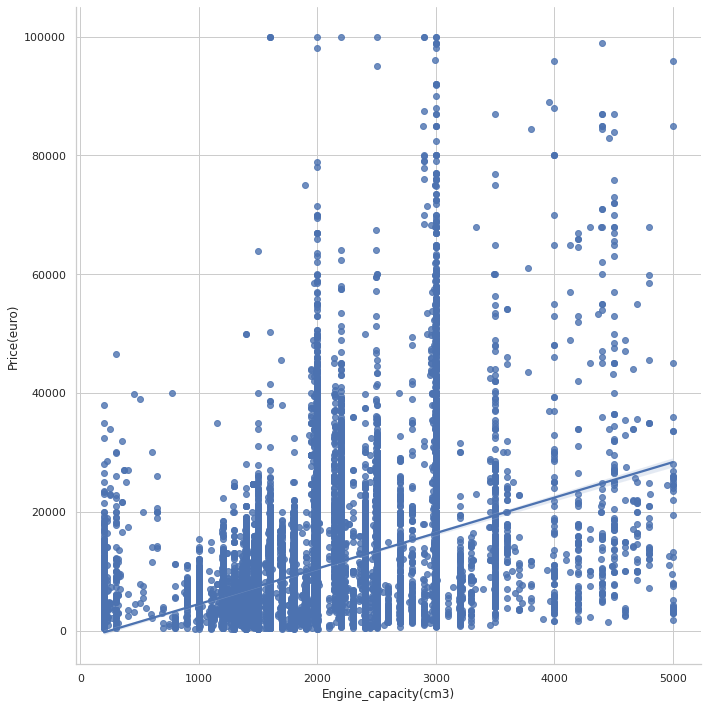

In [118]:
sns.set_style('whitegrid')
fig = sns.lmplot(y='Price(euro)', x='Engine_capacity(cm3)', data=df, height = 10)

Из графика мы можем видеть, что данные не подходят для задачи линейной регрессии.

# Задание 2

### Добавление новых признаков на основе имеющихся

Добавляем новый признак, удельный пробег за год

In [ ]:
df['Age'] = 2022 - df.Year

df['km_year'] = df.Distance/df.Age
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)

Визуализируем распределение по добавленному признаку

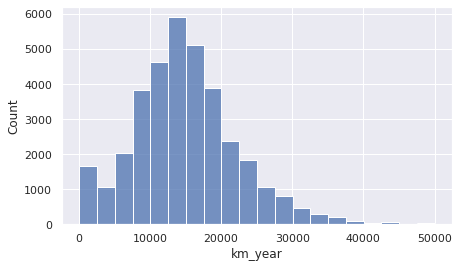

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='km_year',
             bins=20
             )

Введем квантильные категории для признака

In [ ]:
df['km_category'] = 0

df['km_category'] = np.where(df['km_year'] <= 10000, 'Small', df['km_category'])
df['km_category'] = np.where((df['km_year'] > 10000) & (df['km_year'] < 19000), 'Middle', df['km_category'])
df['km_category'] = np.where(df['km_year'] >= 19000, 'Big', df['km_category'])

In [ ]:
df.loc[:, 'km_year':'km_category'].head(8)

,km_year,Age,km_category
0,17727.272727,11,Middle
1,16875.000000,8,Middle
2,11000.000000,10,Middle
3,12500.000000,16,Middle
4,13636.363636,22,Middle
5,24166.666667,12,Big
6,18333.333333,12,Middle
7,7741.935484,31,Small


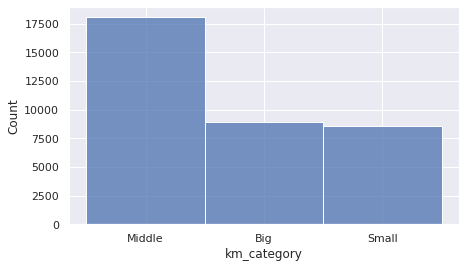

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='km_category',
             bins=3
             )

Получили три категории с нормальным распределением

Введем категории "Редкий дорогой" и "Редкий дешевый"

In [ ]:
count = df.Make.value_counts()

count

Volkswagen    3730
Toyota        3410
Mercedes      3287
BMW           2797
Renault       2616
              ... 
Changan          1
Zotye            1
Tata             1
Saturn           1
Pontiac          1
Name: Make, Length: 78, dtype: int64

In [ ]:
rare = count[(count.values < 25)]
df['Make'] = df['Make'].replace(rare.index.values, 'rare')

rare

UAZ                 21
Chery               19
Acura               18
Great Wall          17
Lancia              17
Cadillac            17
Saab                17
Brilliance          16
Byd                 15
Alta marca          13
Zaz                 13
Lifan               10
Lada                10
Isuzu                6
LuAZ                 5
Buick                5
GMC                  5
Ravon                5
Maserati             4
Tesla                4
Haima                4
Datsun               3
Hummer               3
Scion                3
Geely                3
Faw                  2
Mercedes-Maybach     2
ARO                  2
Groz                 1
Abarth               1
Changan              1
Zotye                1
Tata                 1
Saturn               1
Pontiac              1
Name: Make, dtype: int64

In [ ]:
df['Make'] = np.where((df['Price(euro)'] < 6731) & (df['Make'] == 'rare'), 'Rare cheap', df['Make'])

df['Make'] = np.where((df['Price(euro)'] >= 6731) & (df['Make'] == 'rare'), 'Rare expensive', df['Make'])

df.Make.value_counts()

Volkswagen        3730
Toyota            3410
Mercedes          3287
BMW               2797
Renault           2616
Opel              1956
Skoda             1902
Audi              1649
Ford              1493
Dacia             1458
Nissan            1449
Hyundai           1444
Honda              965
KIA                735
Mitsubishi         670
Lexus              658
Volvo              630
Vaz                493
Mazda              477
Chevrolet          432
Peugeot            414
Citroen            324
Land Rover         305
Seat               258
Suzuki             257
Porsche            222
Fiat               194
Rare cheap         190
Subaru             154
Rover               98
Chrysler            93
Jeep                83
Infiniti            78
Rare expensive      76
Mini                76
Jaguar              75
Daewoo              66
Lincoln             54
Dodge               51
Alfa Romeo          38
GAZ                 34
Ssangyong           34
Smart               33
Moskvich / 

Добавим новый признак Engine_capacity(litre) и категории размера двигателя

In [126]:
df['Engine_capacity(litre)'] = round(df['Engine_capacity(cm3)']/1000, 2)

In [132]:
df['engine_category'] = 0

df['engine_category'] = np.where(df['Engine_capacity(litre)'] <= 1.1, 'Extra Small', df['engine_category'])
df['engine_category'] = np.where((df['Engine_capacity(litre)'] > 1.1) & (df['Engine_capacity(litre)'] <= 1.8), 'Small', df['engine_category'])
df['engine_category'] = np.where((df['Engine_capacity(litre)'] > 1.8) & (df['Engine_capacity(litre)'] <= 3.5), 'Medium', df['engine_category'])
df['engine_category'] = np.where((df['Engine_capacity(litre)'] > 3.5), 'Big', df['engine_category'])

Распределили по классам в зависимости об объема двигателя в литрах по советской системе

In [134]:
df.loc[:, 'Engine_capacity(litre)':'engine_category'].head(10)

,Engine_capacity(litre),engine_category
0,1.80,Small
1,1.50,Small
2,1.50,Small
3,1.60,Small
4,2.20,Medium
5,1.39,Small
6,2.40,Medium
7,2.30,Medium
8,0.30,Extra Small
9,2.20,Medium


Проверим корреляцию новых признаков со старыми признаками

In [ ]:
cm = sns.color_palette("vlag", as_cmap=True)

df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,Year,Distance,Engine_capacity(cm3),Price(euro),km_year,Age
Year,1.000000,-0.447449,-0.035559,0.555244,0.415511,-1.000000
Distance,-0.447449,1.000000,0.074596,-0.356542,0.459713,0.447449
Engine_capacity(cm3),-0.035559,0.074596,1.000000,0.380603,-0.012055,0.035559
Price(euro),0.555244,-0.356542,0.380603,1.000000,0.150299,-0.555244
km_year,0.415511,0.459713,-0.012055,0.150299,1.000000,-0.415511
Age,-1.000000,0.447449,0.035559,-0.555244,-0.415511,1.000000


Видим, что имеется отрицательная корреляция между возрастом и ценой, а для удельного пробега за год самое большое влияние имеет Distance

# Задание 3

### Предварительная обработка данных

Визуализируем часть данных, чтобы сопоставлять с ним результаты предварительной обработки

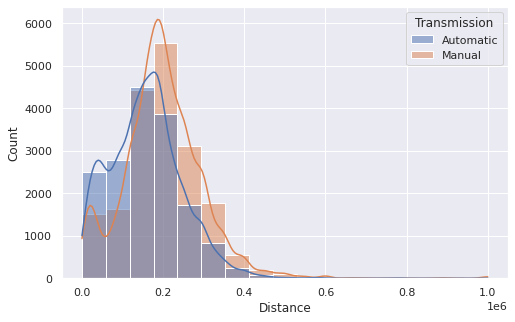

In [ ]:
fig = plt.figure(figsize=(8,5))
sns.histplot(data = df,
             x='Distance',
             hue = 'Transmission',
             bins = 17,
             kde = True)

Проведем стандартизацию данных и сохраним файл

In [ ]:
df_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
df_scaled[num_columns] = (df[num_columns]-M)/STD

df_scaled[num_columns].head(5)

,Year,Distance,Engine_capacity(cm3),Price(euro)
0,0.343526,0.149524,-0.107586,-0.199902
1,0.762388,-0.471297,-0.604550,-0.115411
2,0.483147,-0.729972,-0.604550,-0.326639
3,-0.354577,0.201259,-0.438895,-0.585395
4,-1.192300,1.235960,0.555033,-0.649819


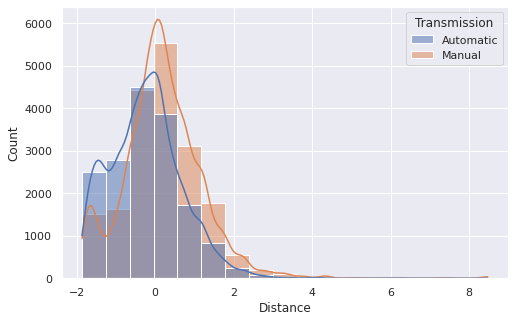

In [ ]:
fig = plt.figure(figsize=(8,5))
sns.histplot(data = df_scaled,
             x='Distance',
             hue = 'Transmission',
             bins = 17,
             kde = True)

Видим, что распределение идентично, изменилось только медианное значение

In [ ]:
df_scaled.to_csv("/content/cars_standartization.csv",index=False)

Проведем нормализацию данных и сохраним файл

In [ ]:
df_norm = df.copy()
xmin = df[num_columns].min()
xmax = df[num_columns].max()

df_norm[num_columns] = (df[num_columns] - xmin)/(xmax - xmin)

df_norm[num_columns].head(5)

,Year,Distance,Engine_capacity(cm3),Price(euro)
0,0.80,0.194919,0.333333,0.075651
1,0.86,0.134913,0.270833,0.083667
2,0.82,0.109911,0.270833,0.063627
3,0.70,0.199920,0.291667,0.039078
4,0.58,0.299930,0.416667,0.032966


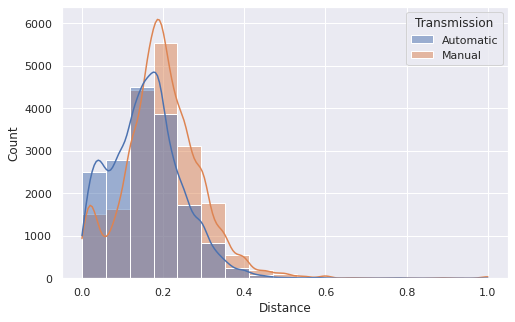

In [ ]:
fig = plt.figure(figsize=(8,5))
sns.histplot(data = df_norm,
             x='Distance',
             hue = 'Transmission',
             bins = 17,
             kde = True)

Видим, что распределение осталось прежним, но значения изменяются в пределах от 0 до 1

In [ ]:
df_norm.to_csv("/content/cars_normalization.csv",index=False)

Выполним степенное преобразование и сохраним результат

In [ ]:
df_power = df.copy()
df_power[num_columns] = np.log(df_power[num_columns])

M = df_power[num_columns].mean()
STD = df_power[num_columns].std()

df_power[num_columns] = (df_power[num_columns]-M)/STD

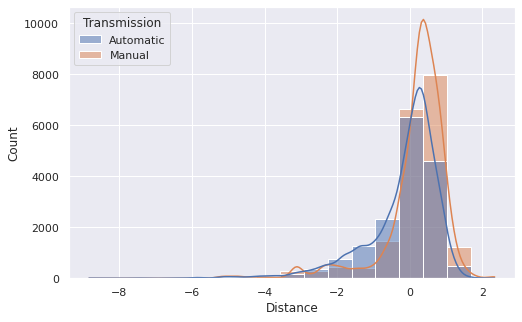

In [ ]:
fig = plt.figure(figsize=(8,5))
sns.histplot(data = df_power,
             x='Distance',
             hue = 'Transmission',
             bins = 17,
             kde = True)

Результат после степенного логарифмического преобразования и стандартизации

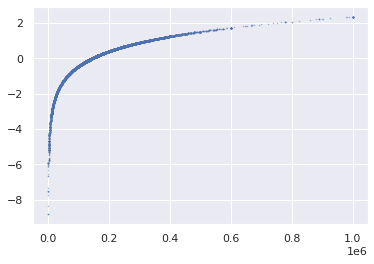

In [ ]:
plt.plot(df['Distance'], df_power['Distance'], '.', alpha = 0.5, markersize = 1)

Видим, что зависимость между пробегом до и после степенного преобразования выражается функцией логарифма

In [ ]:
df_power.to_csv("/content/cars_power.csv",index=False)

Выполним One-hot encoding и сохраним файл

In [ ]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.head(5)

,Year,Distance,Engine_capacity(cm3),Price(euro),km_year,Age,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Chevrolet,...,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual,km_category_Big,km_category_Middle,km_category_Small
0,2011,195000.0,1800.0,7750.0,17727.272727,11,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,2014,135000.0,1500.0,8550.0,16875.000000,8,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2012,110000.0,1500.0,6550.0,11000.000000,10,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2006,200000.0,1600.0,4100.0,12500.000000,16,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,2000,300000.0,2200.0,3490.0,13636.363636,22,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Все категориальные признаки приняли вид матрицы, в которой для каждой строки единица стоит в столбце с верной категорией

In [ ]:
df_ohe.to_csv("/content/cars_onehotencoding.csv",index=False)